In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital-Status", 
           "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss", 
           "Hours-per-week", "Native-Country", "Income"]


In [4]:
# Load the dataset from the URL
df = pd.read_csv(url, names=columns, na_values=" ?", header=None)

In [5]:
# Step 2: Data Exploration
print("First 5 rows of the dataset:\n", df.head())  # Display first 5 rows
print("\nSummary Statistics:\n", df.describe())  # Summary statistics
print("\nMissing values in each column:\n", df.isnull().sum())  # Missing data check

First 5 rows of the dataset:
    Age          Workclass  fnlwgt   Education  Education-Num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        Marital-Status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital-Gain  Capital-Loss  Hours-per-week  Native-Country  Income  
0          2174             0         

In [6]:
# Step 3: Data Cleaning
# Drop rows with missing values
df = df.dropna()

In [7]:
# Step 4: Data Analysis
# Calculate the mean age
mean_age = df['Age'].mean()
print("\nMean Age:", mean_age)


Mean Age: 38.437901995888865


In [8]:
# Group by income to calculate the mean hours worked per week
mean_hours_by_income = df.groupby('Income')['Hours-per-week'].mean()
print("\nMean Hours Worked by Income:\n", mean_hours_by_income)



Mean Hours Worked by Income:
 Income
<=50K    39.348592
>50K     45.706580
Name: Hours-per-week, dtype: float64


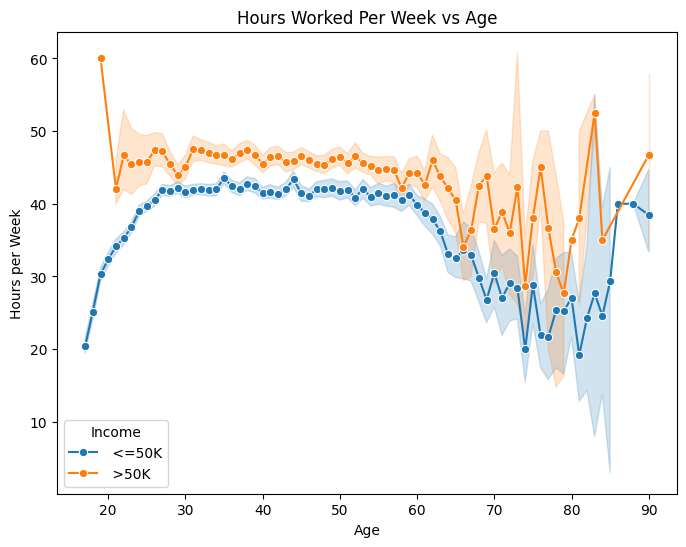

In [9]:
# Step 5: Data Visualization

# 1. Line Plot: Show the trend of hours worked per week based on age
plt.figure(figsize=(8,6))
sns.lineplot(x='Age', y='Hours-per-week', data=df, hue='Income', marker='o')
plt.title('Hours Worked Per Week vs Age')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.legend(title='Income')
plt.show()

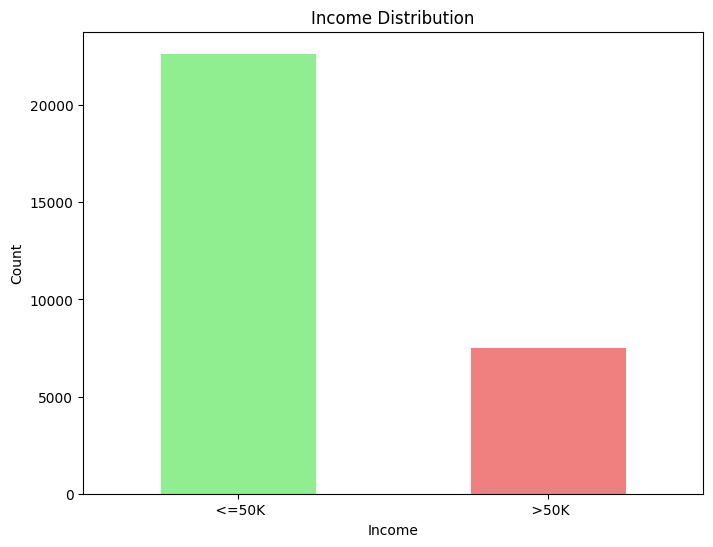

In [10]:
# 2. Bar Chart: Show the distribution of income
plt.figure(figsize=(8,6))
df['Income'].value_counts().plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

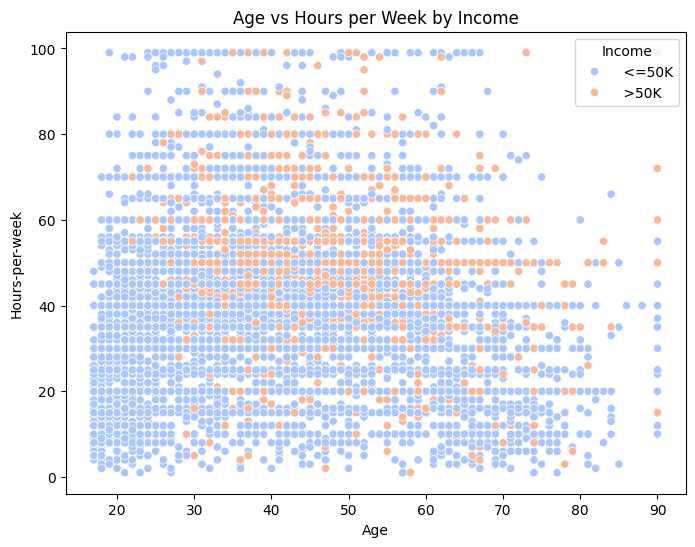

In [11]:
# 3. Scatter Plot: Age vs Hours-per-week, colored by Income
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Hours-per-week', hue='Income', data=df, palette='coolwarm')
plt.title('Age vs Hours per Week by Income')
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.show()

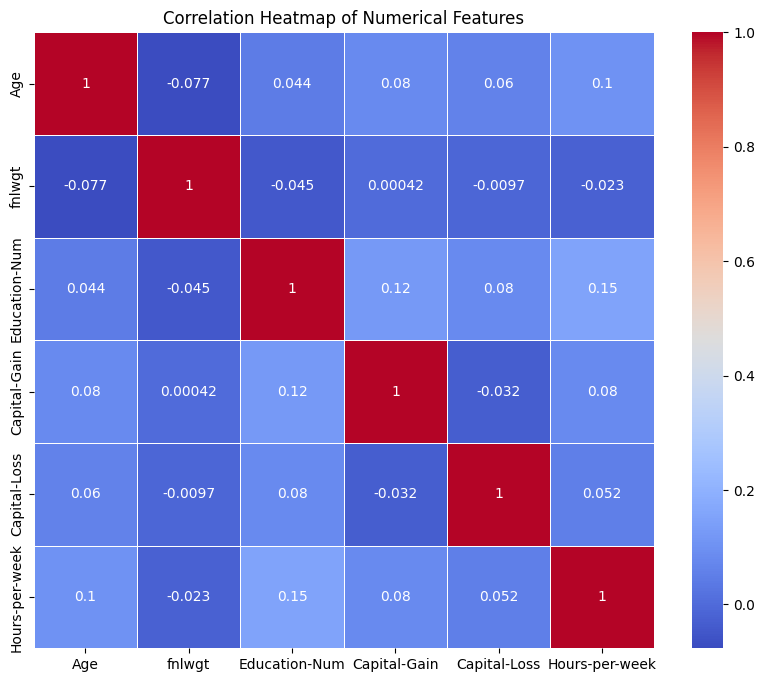

In [12]:
# 4. Correlation Heatmap: Show correlations between numerical features
correlation_matrix = df[['Age', 'fnlwgt', 'Education-Num', 'Capital-Gain', 'Capital-Loss', 'Hours-per-week']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()